Data Loading:

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')

In [2]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Data Preprocessing:

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [5]:
string = list(df.dtypes[df.dtypes == 'object'].index)
string

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [6]:
for col in string:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distribution of prices

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

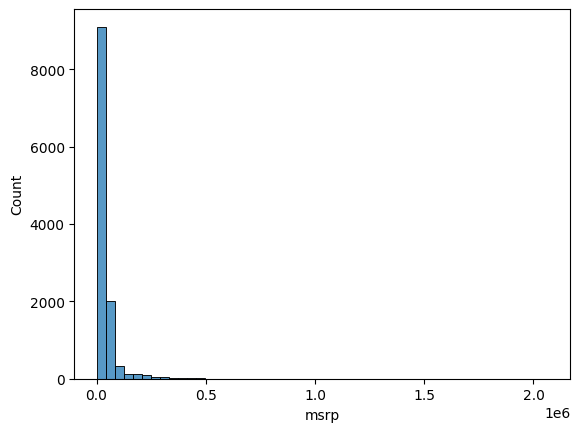

In [10]:
sns.histplot(df.msrp, bins = 50)

<Axes: xlabel='msrp', ylabel='Count'>

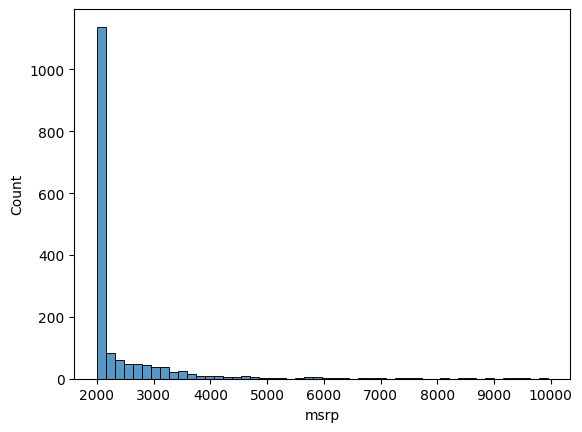

In [11]:
sns.histplot(df.msrp[df.msrp < 10000], bins = 50)

In [12]:
import numpy as np
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

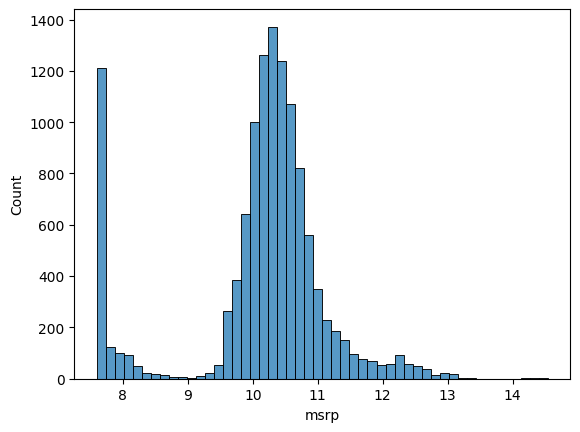

In [13]:
sns.histplot(price_logs, bins = 50)

Missing Values:

In [14]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [15]:
n = len(df)
n_val = int(len(df)* 0.2)
n_test = int(len(df)* 0.2)
n_train = n - n_val - n_test
print(n_train, n_val, n_test)

7150 2382 2382


In [16]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train: n_train + n_val]
df_test = df.iloc[n_train + n_val: n_val + n_test]

In [17]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913], shape=(11914,))

In [18]:
np.random.seed(2)
np.random.shuffle(idx)

In [19]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [20]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [21]:
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11195,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
673,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
11270,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
752,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
3137,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [22]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [23]:
print(df_train.columns)


Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')


In [24]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [25]:
len(y_train), len(y_val), len(y_test)

(7150, 2382, 2382)

Linear Regression:

In [26]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
msrp                                      479775
Name: 10, dtype: object

In [27]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [28]:
def linear_regression(xi):
    n  = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + xi[j]*w[j]
    return pred
    

In [29]:
result = linear_regression(xi)

In [30]:
np.expm1(result)

np.float64(222347.2221101062)

In [31]:
np.log1p(222347.2221101062)

np.float64(12.312)

In [32]:
def dot(xi, w):
    n  = len(xi)
    res = 0.0
    for j in range(n):
        res = res + xi[j]*w[j]
    return res

In [33]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [34]:
linear_regression(xi)

12.312000000000001

In [35]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [36]:
def linear_regression(xi):
    xi = [1] + xi 
    print(xi)
    return dot(xi, w_new)

In [37]:
linear_regression(xi)

[1, 453, 11, 86]


12.312

In [38]:
x1 = [1, 123, 475, 1285]
x2 = [1, 135, 345, 2285]
x10 = [1, 185, 476, 1865]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  123,  475, 1285],
       [   1,  135,  345, 2285],
       [   1,  185,  476, 1865]])

In [39]:
def linear_regression(X):
    return X.dot(w_new)

In [40]:
linear_regression(X)

array([29.97, 26.89, 31.79])

Training a Linear Regression model:

In [41]:
X = [
    [123, 475, 1285],
    [135, 345, 2285],
    [185, 476, 1865],
    [139, 535, 1285],
    [135, 456, 2285],
    [189, 476, 3965],
    [193, 355, 2158],
    [153, 645, 4002],
    [198, 647, 3965]
    
]
X = np.array(X)
X

array([[ 123,  475, 1285],
       [ 135,  345, 2285],
       [ 185,  476, 1865],
       [ 139,  535, 1285],
       [ 135,  456, 2285],
       [ 189,  476, 3965],
       [ 193,  355, 2158],
       [ 153,  645, 4002],
       [ 198,  647, 3965]])

In [42]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [43]:
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.230e+02, 4.750e+02, 1.285e+03],
       [1.000e+00, 1.350e+02, 3.450e+02, 2.285e+03],
       [1.000e+00, 1.850e+02, 4.760e+02, 1.865e+03],
       [1.000e+00, 1.390e+02, 5.350e+02, 1.285e+03],
       [1.000e+00, 1.350e+02, 4.560e+02, 2.285e+03],
       [1.000e+00, 1.890e+02, 4.760e+02, 3.965e+03],
       [1.000e+00, 1.930e+02, 3.550e+02, 2.158e+03],
       [1.000e+00, 1.530e+02, 6.450e+02, 4.002e+03],
       [1.000e+00, 1.980e+02, 6.470e+02, 3.965e+03]])

In [44]:
y = [100, 120, 195, 210, 320, 95, 180, 150, 250]

In [45]:
XTX = X.T.dot(X)

In [46]:
XTX_inv = np.linalg.inv(XTX)

In [47]:
XTX.dot(XTX_inv).round(2)

array([[ 1.,  0.,  0., -0.],
       [ 0.,  1., -0., -0.],
       [ 0., -0.,  1.,  0.],
       [-0.,  0.,  0.,  1.]])

In [48]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 3.80869715e+01,  4.66922772e-01,  2.53228522e-01, -2.23666831e-02])

In [49]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(np.float64(38.08697145637159), array([ 0.46692277,  0.25322852, -0.02236668]))

In [50]:
X = [
    [123, 475, 1285],
    [135, 345, 2285],
    [185, 476, 1865],
    [139, 535, 1285],
    [135, 456, 2285],
    [189, 476, 3965],
    [193, 355, 2158],
    [153, 645, 4002],
    [198, 647, 3965]
    
]
X = np.array(X)

In [51]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [52]:
train_linear_regression(X, y)

(np.float64(38.08697145637159), array([ 0.46692277,  0.25322852, -0.02236668]))

In [53]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [54]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [55]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [56]:
X_train = df_train[base].values

In [57]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [58]:
w0, w = train_linear_regression(X_train, y_train)

w0, w

(np.float64(nan), array([nan, nan, nan, nan, nan]))

In [59]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [60]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [61]:
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)

w0, w

(np.float64(7.927257388069986),
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [62]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

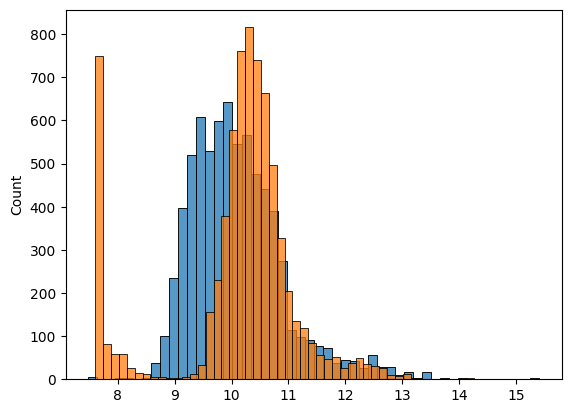

In [63]:
sns.histplot(y_pred, bins = 50)
sns.histplot(y_train, bins = 50)

In [64]:
def rmse(y, y_pred):
    error = y_pred - y
    error = error**2
    mse = np.mean(error)
    rms_error = np.sqrt(mse)
    return rms_error

In [65]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

Validating the Model:

In [66]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

def prepare_X(df):
    df_num = df[base]
    X = df_num[base].fillna(0).values
    return X

In [67]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
y_pred
rmse(y_val,y_pred)

np.float64(0.761653099130156)

In [68]:
2017 - df.year

0         6
1         6
2         6
3         6
4         6
         ..
11909     5
11910     5
11911     5
11912     4
11913    11
Name: year, Length: 11914, dtype: int64

In [69]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [70]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)


np.float64(0.5172055461058299)

<Axes: ylabel='Count'>

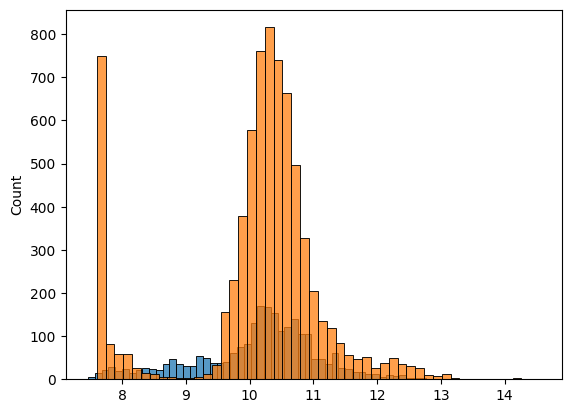

In [71]:
sns.histplot(y_pred, bins = 50)
sns.histplot(y_train, bins = 50)

Categorical Variables:

In [72]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [73]:
categorical_values = ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'highway_mpg', 'city_mpg', 'popularity']

In [74]:
categories = {}

for c in categorical_values:
    categories[c] = list(df[c].value_counts().head().index)

In [75]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'highway_mpg': [24, 23, 26, 22, 25],
 'city_mpg': [17, 16, 15, 18, 19],
 'popularity': [1385, 5657, 873, 2031, 1851]}

Feature Engineering:

In [76]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    features = features.copy()

    for v in [2, 3, 4]:
        df['num_door-%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_door-%s' % v)

    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype(int)
            features.append('%s_%s' % (c, v))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [77]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

np.float64(1322.470462859587)

Regularization:

In [78]:
def train_linear_regression_reg(X, y, r= 0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [79]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

np.float64(0.46235989261564264)

Tuning the model:

In [80]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [81]:
def rmse(y, y_pred):
    error = y_pred - y
    error = error**2
    mse = np.mean(error)
    rms_error = np.sqrt(mse)
    return rms_error

In [82]:
for r in [0.1, 0.01, 0.001, 0.001, 1, 10, 100, 1000]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val,y_pred)
    print(r, w0, score)

0.1 7.751425066583573 0.4624304451067355
0.01 7.871674401079934 0.46235989261564264
0.001 7.884878677366991 0.46235296794325303
0.001 7.884878677366991 0.46235296794325303
1 6.976282695211106 0.463272112703498
10 5.1436746629184 0.4796056179390246
100 2.912349603850071 0.6045525925892887
1000 0.8588686745433955 0.9887712033349981


Using the Model:

In [83]:
df_full_train = pd.concat([df_train, df_val])

In [84]:
df_full_train = df_full_train.reset_index(drop = True)

In [85]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,35750
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,145740
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,74425
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,17595


In [86]:
X_full_train = prepare_X(df_full_train)

In [87]:
y_full_train = np.concatenate([y_train, y_val])

In [88]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test,y_pred)
score

np.float64(0.4535183865263377)

Previously, we included only top 5 features. What happens if we include top 10 features?

In [103]:
categorical_values = ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'highway_mpg', 'city_mpg', 'popularity']

categories = {}

for c in categorical_values:
    categories[c] = list(df[c].value_counts().index[:10])

In [104]:
categories

{'make': ['chevrolet',
  'ford',
  'volkswagen',
  'toyota',
  'dodge',
  'nissan',
  'gmc',
  'honda',
  'mazda',
  'cadillac'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel',
  'electric',
  'flex-fuel_(premium_unleaded_required/e85)',
  'flex-fuel_(premium_unleaded_recommended/e85)',
  'flex-fuel_(unleaded/natural_gas)',
  'natural_gas'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'highway_mpg': [24, 23, 26, 22, 25, 28, 27, 31, 30, 20],
 'city_mpg': [17, 16, 15, 18, 19, 20, 21, 22, 14, 13],
 'popularity': [1385, 5657, 873, 2031, 1851, 2009, 549, 2202, 586, 1624]}

In [105]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    features = features.copy()

    for v in [2, 3, 4]:
        df['num_door-%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_door-%s' % v)

    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype(int)
            features.append('%s_%s' % (c, v))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [106]:
def train_linear_regression_reg(X, y, r= 0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [107]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop = True)
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])

In [108]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test,y_pred)
score

np.float64(0.447247369553352)